In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA


In [3]:
# Load built-in breast cancer dataset
data = load_breast_cancer()

# Create DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display first 5 rows
print(X.head())
print(y.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [4]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
linear_model = SVC(kernel='linear', C=1)
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("=== Linear Kernel ===")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


=== Linear Kernel ===
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [6]:
rbf_model = SVC(kernel='rbf', C=1, gamma='scale')
rbf_model.fit(X_train, y_train)
y_pred_rbf = rbf_model.predict(X_test)

print("=== RBF Kernel ===")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


=== RBF Kernel ===
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



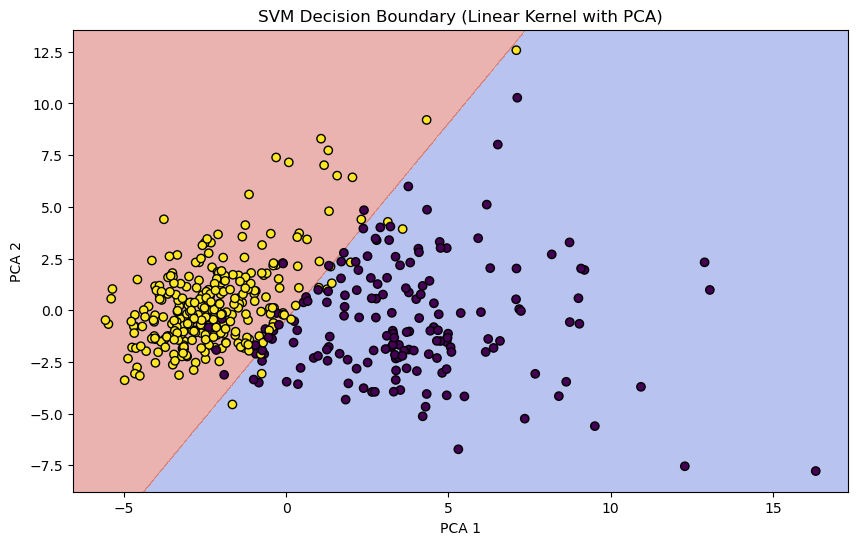

In [7]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split on PCA data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM
svc_vis = SVC(kernel='linear', C=1)
svc_vis.fit(X_train_pca, y_train_pca)

# Meshgrid for plotting
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svc_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, edgecolors='k')
plt.title("SVM Decision Boundary (Linear Kernel with PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [8]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Test Accuracy (Best Model):", grid.score(X_test, y_test))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy (Best Model): 0.9736842105263158


In [9]:
cv_scores = cross_val_score(SVC(kernel='linear', C=1), X_scaled, y, cv=5)
print("Cross-validation Accuracy (Linear Kernel):", cv_scores.mean())


Cross-validation Accuracy (Linear Kernel): 0.9701443875174661


In [10]:
print("Linear SVM Accuracy:", linear_model.score(X_test, y_test))
print("RBF SVM Accuracy:", rbf_model.score(X_test, y_test))
print("Best Grid Search Model Accuracy:", grid.best_score_)


Linear SVM Accuracy: 0.956140350877193
RBF SVM Accuracy: 0.9736842105263158
Best Grid Search Model Accuracy: 0.9736263736263737
